In [1]:
from pySEOBNREPHM.waveform import calculate_waveform_ep 
from pySEOBNREPHM.detector import GWDetector
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m1 = m2 = 10
chi1x = 0.2
chi1y = chi1z = 0
chi2y = -0.3
chi2x = chi2z = 0
e0 = 0.2
dL = 100
zeta_rad = 0
iota_rad = beta_rad = Phic_rad = 0
fMin = 20
Mf_ref = 0.003
waveform, dynamics = calculate_waveform_ep(
    (
        m1,
        m2,
        chi1x,
        chi1y,
        chi1z,
        chi2x,
        chi2y,
        chi2z,
        e0,
        dL,
        zeta_rad,
        iota_rad,
        beta_rad,
        Phic_rad,
    ),
    fMin,
    Mf_ref=Mf_ref,
    srate=16384,
    is_coframe=False,
)

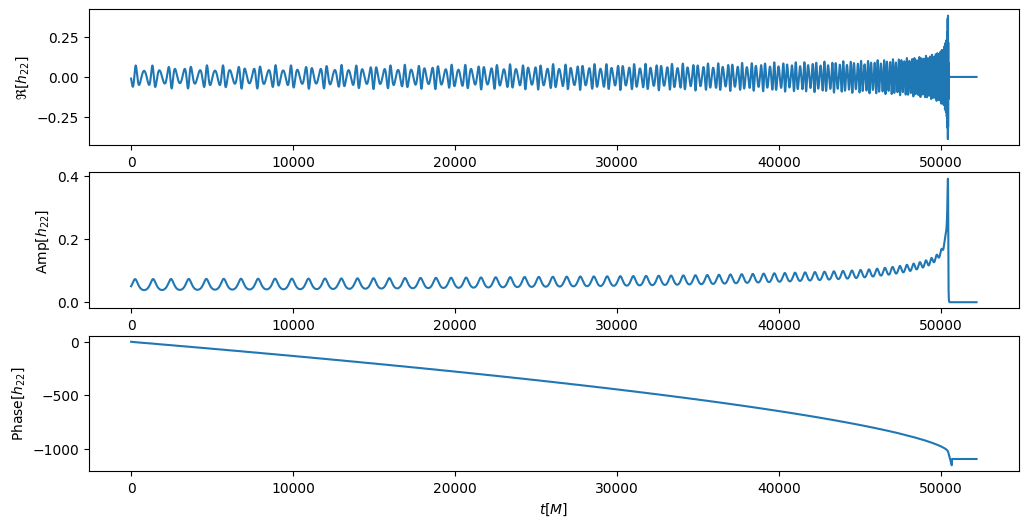

In [3]:
h22 = waveform.h22
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(h22.time, h22.real)
ax1.set_ylabel(r'$\Re[h_{22}]$')

ax2.plot(h22.time, h22.amp)
ax2.set_ylabel(r'${\rm Amp}[h_{22}]$')

ax3.plot(h22.time, h22.phase)
ax3.set_ylabel(r'${\rm Phase}[h_{22}]$')

ax3.set_xlabel(r'$t[M]$')
plt.show()

In [6]:
det_L1 = GWDetector('L1')

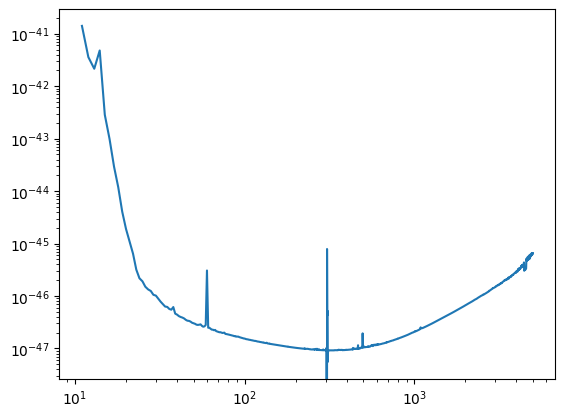

In [11]:
freq = np.linspace(0, 8192, 8193, endpoint=True)
plt.loglog(det_L1(freq))